<a href="https://colab.research.google.com/github/Luizgs7/Imersao_Dados_Bioestatistica/blob/main/Imersao_Dados_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from random import seed
from random import randint
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)

In [2]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=True'

dados = pd.read_csv(url_dados, compression='zip')
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50,g-51,g-52,g-53,g-54,g-55,g-56,g-57,g-58,g-59,g-60,g-61,g-62,g-63,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71,g-72,g-73,g-74,g-75,g-76,g-77,g-78,g-79,g-80,g-81,g-82,g-83,g-84,g-85,g-86,g-87,g-88,g-89,g-90,g-91,g-92,g-93,g-94,g-95,g-96,g-97,g-98,g-99,g-100,g-101,g-102,g-103,g-104,g-105,g-106,g-107,g-108,g-109,g-110,g-111,g-112,g-113,g-114,g-115,g-116,g-117,g-118,g-119,g-120,g-121,g-122,g-123,g-124,g-125,g-126,g-127,g-128,g-129,g-130,g-131,g-132,g-133,g-134,g-135,g-136,g-137,g-138,g-139,g-140,g-141,g-142,g-143,g-144,g-145,g-146,g-147,g-148,g-149,g-150,g-151,g-152,g-153,g-154,g-155,g-156,g-157,g-158,g-159,g-160,g-161,g-162,g-163,g-164,g-165,g-166,g-167,g-168,g-169,g-170,g-171,g-172,g-173,g-174,g-175,g-176,g-177,g-178,g-179,g-180,g-181,g-182,g-183,g-184,g-185,g-186,g-187,g-188,g-189,g-190,g-191,g-192,g-193,g-194,g-195,g-196,g-197,g-198,g-199,g-200,g-201,g-202,g-203,g-204,g-205,g-206,g-207,g-208,g-209,g-210,g-211,g-212,g-213,g-214,g-215,g-216,g-217,g-218,g-219,g-220,g-221,g-222,g-223,g-224,g-225,g-226,g-227,g-228,g-229,g-230,g-231,g-232,g-233,g-234,g-235,g-236,g-237,g-238,g-239,g-240,g-241,g-242,g-243,g-244,g-245,g-246,g-247,g-248,g-249,g-250,g-251,g-252,g-253,g-254,g-255,g-256,g-257,g-258,g-259,g-260,g-261,g-262,g-263,g-264,g-265,g-266,g-267,g-268,g-269,g-270,g-271,g-272,g-273,g-274,g-275,g-276,g-277,g-278,g-279,g-280,g-281,g-282,g-283,g-284,g-285,g-286,g-287,g-288,g-289,g-290,g-291,g-292,g-293,g-294,g-295,g-296,g-297,g-298,g-299,g-300,g-301,g-302,g-303,g-304,g-305,g-306,g-307,g-308,g-309,g-310,g-311,g-312,g-313,g-314,g-315,g-316,g-317,g-318,g-319,g-320,g-321,g-322,g-323,g-324,g-325,g-326,g-327,g-328,g-329,g-330,g-331,g-332,g-333,g-334,g-335,g-336,g-337,g-338,g-339,g-340,g-341,g-342,g-343,g-344,g-345,g-346,g-347,g-348,g-349,g-350,g-351,g-352,g-353,g-354,g-355,g-356,g-357,g-358,g-359,g-360,g-361,g-362,g-363,g-364,g-365,g-366,g-367,g-368,g-369,g-370,g-371,g-372,g-373,g-374,g-375,g-376,g-377,g-378,g-379,g-380,g-381,g-382,g-383,g-384,g-385,g-386,g-387,g-388,g-389,g-390,g-391,g-392,g-393,g-394,g-395,g-396,g-397,g-398,g-399,g-400,g-401,g-402,g-403,g-404,g-405,g-406,g-407,g-408,g-409,g-410,g-411,g-412,g-413,g-414,g-415,g-416,g-417,g-418,g-419,g-420,g-421,g-422,g-423,g-424,g-425,g-426,g-427,g-428,g-429,g-430,g-431,g-432,g-433,g-434,g-435,g-436,g-437,g-438,g-439,g-440,g-441,g-442,g-443,g-444,g-445,g-446,g-447,g-448,g-449,g-450,g-451,g-452,g-453,g-454,g-455,g-456,g-457,g-458,g-459,g-460,g-461,g-462,g-463,g-464,g-465,g-466,g-467,g-468,g-469,g-470,g-471,g-472,g-473,g-474,g-475,g-476,g-477,g-478,g-479,g-480,g-481,g-482,g-483,g-484,g-485,g-486,g-487,g-488,g-489,g-490,g-491,g-492,g-493,g-494,g-495,g-496,g-497,g-498,g-499,g-500,g-501,g-502,g-503,g-504,g-505,g-506,g-507,g-508,g-509,g-510,g-511,g-512,g-513,g-514,g-515,g-516,g-517,g-518,g-519,g-520,g-521,g-522,g-523,g-524,g-525,g-526,g-527,g-528,g-529,g-530,g-531,g-532,g-533,g-534,g-535,g-536,g-537,g-538,g-539,g-540,g-541,g-542,g-543,g-544,g-545,g-546,g-547,g-548,g-549,g-550,g-551,g-552,g-553,g-554,g-555,g-556,g-557,g-558,g-559,g-560,g-561,g-562,g-563,g-564,g-565,g-566,g-567,g-568,g-569,g-570,g-571,g-572,g-573,g-574,g-575,g-576,g-577,g-578,g-579,g-580,g-581,g-582,g-583,g-584,g-585,g-586,g-587,g-588,g-589,g-590,g-591,g-592,g-593,g-594,g-595,g-596,g-597,g-598,g-599,g-600,g-601,g-602,g-603,g-604,g-605,g-606,g-607,g-608,g-609,g-610,g-611,g-612,g-613,g-614,g-615,g-616,g-617,g-618,g-619,g-620,g-621,g-622,g-623,g-624,g-625,g-626,g-627,g-628,g-629,g-630,g-631,g-632,g-633,g-634,g-635,g-636,g-637,g-638,g-639,g-640,g-641,g-642,g-643,g-644,g-645,g-646,g-647,g-648,g-649,g-650,g-651,g-652,g-653,g-654,g-655,g-656,g-657,g-658,g-659,g-660,g-661,g-662,g-663,g-664,g-665,g-666,g-667,g-668,g-669,g-670,g-671,g-672,g-673,g-674,g-675,g-676,g-677,g-678,g-67

In [3]:
url_resultados = 'https://github.com/alura-cursos/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true'

dados_resultados = pd.read_csv(url_resultados)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_antifolate,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,benzodiazepine_receptor_agonist,beta_amyloid_inhibitor,bromodomain_inhibitor,btk_inhibitor,calcineurin_inhibitor,calcium_channel_blocker,cannabinoid_receptor_agonist,cannabinoid_receptor_antagonist,carbonic_anhydrase_inhibitor,casein_kinase_inhibitor,caspase_activator,catechol_o_methyltransferase_inhibitor,cc_chemokine_receptor_antagonist,cck_receptor_antagonist,cdk_inhibitor,chelating_agent,chk_inhibitor,chloride_channel_blocker,cholesterol_inhibitor,cholinergic_receptor_antagonist,coagulation_factor_inhibitor,corticosteroid_agonist,cyclooxygenase_inhibitor,cytochrome_p450_inhibitor,dihydrofolate_reductase_inhibitor,dipeptidyl_peptidase_inhibitor,diuretic,dna_alkylating_agent,dna_inhibitor,dopamine_receptor_agonist,dopamine_receptor_antagonist,egfr_inhibitor,elastase_inhibitor,erbb2_inhibitor,estrogen_receptor_agonist,estrogen_receptor_antagonist,faah_inhibitor,farnesyltransferase_inhibitor,fatty_acid_receptor_agonist,fgfr_inhibitor,flt3_inhibitor,focal_adhesion_kinase_inhibitor,free_radical_scavenger,fungal_squalene_epoxidase_inhibitor,gaba_receptor_agonist,gaba_receptor_antagonist,gamma_secretase_inhibitor,glucocorticoid_receptor_agonist,glutamate_inhibitor,glutamate_receptor_agonist,glutamate_receptor_antagonist,gonadotropin_receptor_agonist,gsk_inhibitor,hcv_inhibitor,hdac_inhibitor,histamine_receptor_agonist,histamine_receptor_antagonist,histone_lysine_demethylase_inhibitor,histone_lysine_methyltransferase_inhibitor,hiv_inhibitor,hmgcr_inhibitor,hsp_inhibitor,igf-1_inhibitor,ikk_inhibitor,imidazoline_receptor_agonist,immunosuppressant,insulin_secretagogue,insulin_sensitizer,integrin_inhibitor,jak_inhibitor,kit_inhibitor,laxative,leukotriene_inhibitor,leukotriene_receptor_antagonist,lipase_inhibitor,lipoxygenase_inhibitor,lxr_agonist,mdm_inhibitor,mek_inhibitor,membrane_integrity_inhibitor,mineralocorticoid_receptor_antagonist,monoacylglycerol_lipase_inhibitor,monoamine_oxidase_inhibitor,monopolar_spindle_1_kinase_inhibitor,mtor_inhibitor,mucolytic_agent,neuropeptide_receptor_antagonist,nfkb_inhibitor,nicotinic_receptor_agonist,nitric_oxide_donor,nitric_oxide_production_inhibitor,nitric_oxide_synthase_inhibitor,norepinephrine_reuptake_inhibitor,nrf2_activator,opioid_receptor_agonist,opioid_receptor_antagonist,orexin_receptor_antagonist,p38_mapk_inhibitor,p-glycoprotein_inhibitor,parp_inhibitor,pdgfr_inhibitor,pdk_inhibitor,phosphodiesterase_inhibitor,phospholipase_inhibitor,pi3k_inhibitor,pkc_inhibitor,potassium_channel_activator,potassium_channel_antagonist,ppar_receptor_agonist,ppar_receptor_antagonist,progesterone_receptor_agonist,progesterone_receptor_antagonist,prostaglandin_inhibitor,prostanoid_receptor_antagonist,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor

In [4]:
# Renomeando colunas: tirando hífen do nome das colunas

# Cria dicionário com o antigo nome e o novo nome (substituindo o hífen por underline)
columns = dict(zip(dados.columns, dados.columns.str.replace('-', '_')))

# Renomeia na base original
dados.rename(columns = columns, inplace = True)

# Renomeia coluna droga para composto
mapa = {'droga':'composto'}
dados.rename(columns = mapa, inplace=True)

dados.head()

,id,tratamento,tempo,dose,composto,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,g_26,g_27,g_28,g_29,g_30,g_31,g_32,g_33,g_34,g_35,g_36,g_37,g_38,g_39,g_40,g_41,g_42,g_43,g_44,g_45,g_46,g_47,g_48,g_49,g_50,g_51,g_52,g_53,g_54,g_55,g_56,g_57,g_58,g_59,g_60,g_61,g_62,g_63,g_64,g_65,g_66,g_67,g_68,g_69,g_70,g_71,g_72,g_73,g_74,g_75,g_76,g_77,g_78,g_79,g_80,g_81,g_82,g_83,g_84,g_85,g_86,g_87,g_88,g_89,g_90,g_91,g_92,g_93,g_94,g_95,g_96,g_97,g_98,g_99,g_100,g_101,g_102,g_103,g_104,g_105,g_106,g_107,g_108,g_109,g_110,g_111,g_112,g_113,g_114,g_115,g_116,g_117,g_118,g_119,g_120,g_121,g_122,g_123,g_124,g_125,g_126,g_127,g_128,g_129,g_130,g_131,g_132,g_133,g_134,g_135,g_136,g_137,g_138,g_139,g_140,g_141,g_142,g_143,g_144,g_145,g_146,g_147,g_148,g_149,g_150,g_151,g_152,g_153,g_154,g_155,g_156,g_157,g_158,g_159,g_160,g_161,g_162,g_163,g_164,g_165,g_166,g_167,g_168,g_169,g_170,g_171,g_172,g_173,g_174,g_175,g_176,g_177,g_178,g_179,g_180,g_181,g_182,g_183,g_184,g_185,g_186,g_187,g_188,g_189,g_190,g_191,g_192,g_193,g_194,g_195,g_196,g_197,g_198,g_199,g_200,g_201,g_202,g_203,g_204,g_205,g_206,g_207,g_208,g_209,g_210,g_211,g_212,g_213,g_214,g_215,g_216,g_217,g_218,g_219,g_220,g_221,g_222,g_223,g_224,g_225,g_226,g_227,g_228,g_229,g_230,g_231,g_232,g_233,g_234,g_235,g_236,g_237,g_238,g_239,g_240,g_241,g_242,g_243,g_244,g_245,g_246,g_247,g_248,g_249,g_250,g_251,g_252,g_253,g_254,g_255,g_256,g_257,g_258,g_259,g_260,g_261,g_262,g_263,g_264,g_265,g_266,g_267,g_268,g_269,g_270,g_271,g_272,g_273,g_274,g_275,g_276,g_277,g_278,g_279,g_280,g_281,g_282,g_283,g_284,g_285,g_286,g_287,g_288,g_289,g_290,g_291,g_292,g_293,g_294,g_295,g_296,g_297,g_298,g_299,g_300,g_301,g_302,g_303,g_304,g_305,g_306,g_307,g_308,g_309,g_310,g_311,g_312,g_313,g_314,g_315,g_316,g_317,g_318,g_319,g_320,g_321,g_322,g_323,g_324,g_325,g_326,g_327,g_328,g_329,g_330,g_331,g_332,g_333,g_334,g_335,g_336,g_337,g_338,g_339,g_340,g_341,g_342,g_343,g_344,g_345,g_346,g_347,g_348,g_349,g_350,g_351,g_352,g_353,g_354,g_355,g_356,g_357,g_358,g_359,g_360,g_361,g_362,g_363,g_364,g_365,g_366,g_367,g_368,g_369,g_370,g_371,g_372,g_373,g_374,g_375,g_376,g_377,g_378,g_379,g_380,g_381,g_382,g_383,g_384,g_385,g_386,g_387,g_388,g_389,g_390,g_391,g_392,g_393,g_394,g_395,g_396,g_397,g_398,g_399,g_400,g_401,g_402,g_403,g_404,g_405,g_406,g_407,g_408,g_409,g_410,g_411,g_412,g_413,g_414,g_415,g_416,g_417,g_418,g_419,g_420,g_421,g_422,g_423,g_424,g_425,g_426,g_427,g_428,g_429,g_430,g_431,g_432,g_433,g_434,g_435,g_436,g_437,g_438,g_439,g_440,g_441,g_442,g_443,g_444,g_445,g_446,g_447,g_448,g_449,g_450,g_451,g_452,g_453,g_454,g_455,g_456,g_457,g_458,g_459,g_460,g_461,g_462,g_463,g_464,g_465,g_466,g_467,g_468,g_469,g_470,g_471,g_472,g_473,g_474,g_475,g_476,g_477,g_478,g_479,g_480,g_481,g_482,g_483,g_484,g_485,g_486,g_487,g_488,g_489,g_490,g_491,g_492,g_493,g_494,g_495,g_496,g_497,g_498,g_499,g_500,g_501,g_502,g_503,g_504,g_505,g_506,g_507,g_508,g_509,g_510,g_511,g_512,g_513,g_514,g_515,g_516,g_517,g_518,g_519,g_520,g_521,g_522,g_523,g_524,g_525,g_526,g_527,g_528,g_529,g_530,g_531,g_532,g_533,g_534,g_535,g_536,g_537,g_538,g_539,g_540,g_541,g_542,g_543,g_544,g_545,g_546,g_547,g_548,g_549,g_550,g_551,g_552,g_553,g_554,g_555,g_556,g_557,g_558,g_559,g_560,g_561,g_562,g_563,g_564,g_565,g_566,g_567,g_568,g_569,g_570,g_571,g_572,g_573,g_574,g_575,g_576,g_577,g_578,g_579,g_580,g_581,g_582,g_583,g_584,g_585,g_586,g_587,g_588,g_589,g_590,g_591,g_592,g_593,g_594,g_595,g_596,g_597,g_598,g_599,g_600,g_601,g_602,g_603,g_604,g_605,g_606,g_607,g_608,g_609,g_610,g_611,g_612,g_613,g_614,g_615,g_616,g_617,g_618,g_619,g_620,g_621,g_622,g_623,g_624,g_625,g_626,g_627,g_628,g_629,g_630,g_631,g_632,g_633,g_634,g_635,g_636,g_637,g_638,g_639,g_640,g_641,g_642,g_643,g_644,g_645,g_646,g_647,g_648,g_649,g_650,g_651,g_652,g_653,g_654,g_655,g_656,g_657,g_658,g_659,g_660,g_661,g_662,g_663,g_664,g_665,g_666,g_667,g_668,g_669,g_670,g_671,g_672,g_673,g_674,g_675,g_676,g_677,g_678,g

In [5]:
# Criando variaves para agrear resultados
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] !=0)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_antifolate,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,benzodiazepine_receptor_agonist,beta_amyloid_inhibitor,bromodomain_inhibitor,btk_inhibitor,calcineurin_inhibitor,calcium_channel_blocker,cannabinoid_receptor_agonist,cannabinoid_receptor_antagonist,carbonic_anhydrase_inhibitor,casein_kinase_inhibitor,caspase_activator,catechol_o_methyltransferase_inhibitor,cc_chemokine_receptor_antagonist,cck_receptor_antagonist,cdk_inhibitor,chelating_agent,chk_inhibitor,chloride_channel_blocker,cholesterol_inhibitor,cholinergic_receptor_antagonist,coagulation_factor_inhibitor,corticosteroid_agonist,cyclooxygenase_inhibitor,cytochrome_p450_inhibitor,dihydrofolate_reductase_inhibitor,dipeptidyl_peptidase_inhibitor,diuretic,dna_alkylating_agent,dna_inhibitor,dopamine_receptor_agonist,dopamine_receptor_antagonist,egfr_inhibitor,elastase_inhibitor,erbb2_inhibitor,estrogen_receptor_agonist,estrogen_receptor_antagonist,faah_inhibitor,farnesyltransferase_inhibitor,fatty_acid_receptor_agonist,fgfr_inhibitor,flt3_inhibitor,focal_adhesion_kinase_inhibitor,free_radical_scavenger,fungal_squalene_epoxidase_inhibitor,gaba_receptor_agonist,gaba_receptor_antagonist,gamma_secretase_inhibitor,glucocorticoid_receptor_agonist,glutamate_inhibitor,glutamate_receptor_agonist,glutamate_receptor_antagonist,gonadotropin_receptor_agonist,gsk_inhibitor,hcv_inhibitor,hdac_inhibitor,histamine_receptor_agonist,histamine_receptor_antagonist,histone_lysine_demethylase_inhibitor,histone_lysine_methyltransferase_inhibitor,hiv_inhibitor,hmgcr_inhibitor,hsp_inhibitor,igf-1_inhibitor,ikk_inhibitor,imidazoline_receptor_agonist,immunosuppressant,insulin_secretagogue,insulin_sensitizer,integrin_inhibitor,jak_inhibitor,kit_inhibitor,laxative,leukotriene_inhibitor,leukotriene_receptor_antagonist,lipase_inhibitor,lipoxygenase_inhibitor,lxr_agonist,mdm_inhibitor,mek_inhibitor,membrane_integrity_inhibitor,mineralocorticoid_receptor_antagonist,monoacylglycerol_lipase_inhibitor,monoamine_oxidase_inhibitor,monopolar_spindle_1_kinase_inhibitor,mtor_inhibitor,mucolytic_agent,neuropeptide_receptor_antagonist,nfkb_inhibitor,nicotinic_receptor_agonist,nitric_oxide_donor,nitric_oxide_production_inhibitor,nitric_oxide_synthase_inhibitor,norepinephrine_reuptake_inhibitor,nrf2_activator,opioid_receptor_agonist,opioid_receptor_antagonist,orexin_receptor_antagonist,p38_mapk_inhibitor,p-glycoprotein_inhibitor,parp_inhibitor,pdgfr_inhibitor,pdk_inhibitor,phosphodiesterase_inhibitor,phospholipase_inhibitor,pi3k_inhibitor,pkc_inhibitor,potassium_channel_activator,potassium_channel_antagonist,ppar_receptor_agonist,ppar_receptor_antagonist,progesterone_receptor_agonist,progesterone_receptor_antagonist,prostaglandin_inhibitor,prostanoid_receptor_antagonist,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor

In [6]:
# Juntando tabelas de experimento e resultados
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')

### Modelos

#### 1 - Regressão Logistica

In [27]:
# Separa teste e treino
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,
                                                        test_size=0.2,
                                                        stratify=y,
                                                        random_state=7)

In [28]:
# Regressão Logistica

modelo_rlogistica = LogisticRegression(max_iter = 1000,
                                       random_state=7)
modelo_rlogistica.fit(x_treino,y_treino)

modelo_rlogistica.score(x_teste, y_teste)

0.6292252781860173

In [24]:
# Modelo Dummy Classifier para compara o resultado

modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)



In [25]:
# Teste
accuracy_score(y_teste, previsao_dummy)

0.6090699139197985

#### 2 - Arvore de Decisão

In [35]:
# Arvore de decisao: max_depth = 4
modelo_arvore = DecisionTreeClassifier(max_depth=15,
                                       random_state=7)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.5945832458534537

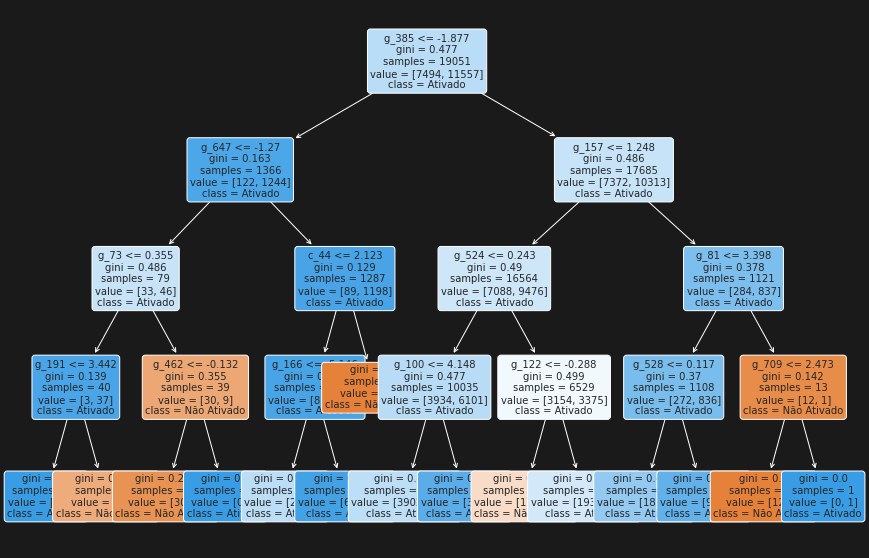

In [32]:
# Criando arvore
fig, ax = plt.subplots(figsize=(15,10), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativado', 'Ativado'])
plt.show()

In [36]:
# Iteração para testar diferentes profundidades da arvore para o treino e o teste
teste=[]
treino=[]
for i in range(1,15):
  modelo_arvore = DecisionTreeClassifier(max_depth=i,
                                       random_state=7)
  modelo_arvore.fit(x_treino, y_treino)
  teste.append(modelo_arvore.score(x_teste, y_teste))
  treino.append(modelo_arvore.score(x_treino, y_treino))
  

In [ ]:
# Visualizando o overfitting pelo aumento da profundidade da arvore
sns.lineplot(x=range(1,15), y=teste, lavel='teste')
sns.lineplot(x=range(1,15), y=treino, lavel='treino')

#### 2 - Random Forest

id dose   composto     g_0     g_1     g_2     g_3     g_4  \
0      id_000644bb2   D1  b68db1d53  1.0620  0.5577 -0.2479 -0.6208 -0.1944   
1      id_000779bfc   D1  df89a8e5a  0.0743  0.4087  0.2991  0.0604  1.0190   
2      id_000a6266a   D1  18bb41b2c  0.6280  0.5817  1.5540 -0.0764 -0.0323   
3      id_0015fd391   D1  8c7f86626 -0.5138 -0.2491 -0.2656  0.5288  4.0620   
4      id_001626bd3   D2  7cbed3131 -0.3254 -0.4009  0.9700  0.6919  1.4180   
...             ...  ...        ...     ...     ...     ...     ...     ...   
23809  id_fffb1ceed   D2  df1d0a5a1  0.1394 -0.0636 -0.1112 -0.5080 -0.4713   
23810  id_fffb70c0c   D2  ecf3b6b74 -1.3260  0.3478 -0.3743  0.9905 -0.7178   
23811  id_fffc1c3f4   D2  cacb2b860  0.3942  0.3756  0.3109 -0.7389  0.5505   
23812  id_fffcb9e7c   D1  8b87a7a83  0.6660  0.2324  0.4392  0.2044  0.8531   
23813  id_ffffdd77b   D1  972f41291 -0.8598  1.0240 -0.1361  0.7952 -0.3611   

          g_5     g_6     g_7     g_8     g_9    g_10    g_11    g_12    g_13  \
0     -1.0120 -1.0220 -0.0326  0.5548 -0.0921  1.1830  0.1530  0.5574 -0.4015   
1      0.5207  0.2341  0.3372 -0.4047  0.8507 -1.1520 -0.4201 -0.0958  0.4590   
2      1.2390  0.1715  0.2155  0.0065  1.2300 -0.4797 -0.5631 -0.0366 -1.8300   
3     -0.8095 -1.9590  0.1792 -0.1321 -1.0600 -0.8269 -0.3584 -0.8511 -0.5844   
4     -0.8244 -0.2800 -0.1498 -0.8789  0.8630 -0.2219 -0.5121 -0.9577  1.1750   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
23809  0.7201  0.5773  0.3055 -0.4726  0.1269  0.2531  0.1730 -0.4532 -1.0790   
23810  0.6621 -0.2252 -0.5565  0.5112  0.6727 -0.1851  2.8650 -0.2140 -0.6153   
23811 -0.0159 -0.2541  0.1745 -0.0340  0.4865 -0.1854  0.0716  0.1729 -0.0434   
23812 -0.0343  0.0323  0.0463  0.4299 -0.7985  0.5742  0.1421  2.2700  0.2046   
23813 -3.6750 -1.2420  0.9146  3.0790  1.2460  1.9460  1.4370  2.9780  2.2370   

         g_14    g_15    g_16    g_17    g_18    g_19    g_20    g_21    g_22  \
0      0.1789 -0.6528 -0.7969  0.6342  0.1778 -0.3694 -0.5688 -1.1360 -1.1880   
1      0.0803  0.2250  0.5293  0.2839 -0.3494  0.2883  0.9449 -0.1646 -0.2657   
2      0.6057 -0.3278  0.6042 -0.3075 -0.1147 -0.0570 -0.0799 -0.8181 -1.5320   
3     -2.5690  0.8183 -0.0532 -0.8554  0.1160 -2.3520  2.1200 -1.1580 -0.7191   
4      0.2042  0.1970  0.1244 -1.7090 -0.3543 -0.5160 -0.3330 -0.2685  0.7649   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
23809  0.2474 -0.4550  0.3588  0.1600 -0.7362 -0.1103  0.8550 -0.4139  0.5541   
23810  0.8362  0.5584 -0.2589  0.1292  0.0148  0.0949 -0.2182 -0.9235  0.0749   
23811  0.1542 -0.2192 -0.0302 -0.4218  0.4057 -0.5372  0.1521 -0.2651  0.2310   
23812  0.5363 -1.7330  0.1450  0.6097  0.2024  0.9865 -0.7805  0.9608  0.3440   
23813 -0.6818  0.6870 -1.1060  0.0182 -0.9247 -0.0738 -0.1919 -0.7722 -1.4050   

         g_23    g_24    g_25    g_26    g_27    g_28    g_29    g_30    g_31  \
0      0.6940  0.4393  0.2664  0.1907  0.1628 -0.2853  0.5819  0.2934 -0.5584   
1     -0.3372  0.3135 -0.4316  0.4773  0.2075 -0.4216 -0.1161 -0.0499 -0.2627   
2      0.2307  0.4901  0.4780 -1.3970  4.6240 -0.0437  1.2870 -1.8530  0.6069   
3     -0.8004 -1.4670 -0.0107 -0.8995  0.2406 -0.2479 -1.0890 -0.7575  0.0881   
4      0.2057  1.3720  0.6835  0.8056 -0.3754 -1.2090  0.2965 -0.0712  0.6389   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
23809  0.2310 -0.5573 -0.4397 -0.9260 -0.2424 -0.6686  0.2326  0.6456  0.0136   
23810 -1.5910 -0.8359 -0.9217  0.3013  0.1716  0.0880  0.1842  0.1835  0.5436   
23811 -0.8101  0.4943  0.6905 -0.3720 -1.4110  0.4516  1.2300 -0.1949 -1.3280   
23812  2.7650  0.4925  0.6698  0.2374 -0.3372  0.8771 -2.6560 -0.2000 -0.2043   
23813 -1.0050 -1.1170 -0.5293 -1.1720 -0.2885  0.1599 -0.4250  0.3591 -0.1420   

         g_32    g_33    g_34    g_35    g_36    g_37    g_38    g_39    g_40  \
0     -0.0916 -0.3010 -0.1537  0.2198  0.2965 -0.5055 -0.5119 -0.216

In [43]:
# Random Forest
# Separa teste e treino
x = dados_combinados.drop(['id', 'composto', 'n_moa', 'ativo_moa'], axis=1)
y = dados_combinados['ativo_moa']

# Tranforma variáveis categóricas para dummy (Onehotencoding)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,
                                                        test_size=0.2,
                                                        stratify=y,
                                                        random_state=7)

In [45]:
# Arvore de decisao: max_depth = 4
modelo_randomforest = RandomForestClassifier(random_state=7)
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

0.6867520470291832

### Desafios

1 - Tentar outros modelos ou mudar os parâmetros dos atuais

2 - Estudar a documentação do Sklearn

3 - Chossing the right estimator Sklearn

4 - Testar outras perguntas. Ex: Escolher MOA para ver se generaliza bem

5 - Escolha a droga mais utilizada e tente criar um modeo para prever esta label.

6 - Resumir o que aprendeu